In [39]:
import pandas as pd
import numpy as np
from pyproj import Proj, transform
df = pd.read_excel(r'../dataset/2023 Pollution Inventory Dataset V2.xlsx',skiprows=9)
df22 = pd.read_excel(r'../dataset/2022 Pollution Inventory Dataset V2.xlsx',skiprows=9)
df21 = pd.read_excel(r'../dataset/2021 Pollution Inventory Dataset.xlsx',skiprows=9)
df20 = pd.read_excel(r'../dataset/2020 Pollution Inventory Dataset V2.xlsx',skiprows=9)
df19 = pd.read_excel(r'../dataset/2019 Pollution Inventory Dataset V2.xlsx',skiprows=9)
df18 = pd.read_excel(r'../dataset/2018 Pollution Inventory.xlsx',skiprows=9)
df17 = pd.read_excel(r'../dataset/2017 Pollution Inventory Dataset.xlsx',skiprows=9)
df16 = pd.read_excel(r'../dataset/2016 Pollution Inventory dataset - version 2.xlsx', sheet_name=1, skiprows=9)

In [40]:
df18 = df18.iloc[:32560]
df18

,AUTHORISATION ID / PERMIT ID,ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,REPORTING THRESHOLD (kg),QUANTITY RELEASED (kg),REGULATED INDUSTRY SECTOR,REGULATED INDUSTRY SUB SECTOR
0,UP3435TW,"INTENSIVE FARMING; > 40,000 POULTRY",GW Padley Poultry Ltd,Menzies Poultry Unit Main Road Boston Lincolns...,PE22 0TT,535100.0,351980.0,Lincolnshire and Northamptonshire,Air,Ammonia,1000.00000,11827.07,Agriculture,Intensive Farming
1,UP3435TW,"INTENSIVE FARMING; > 40,000 POULTRY",GW Padley Poultry Ltd,Menzies Poultry Unit Main Road Boston Lincolns...,PE22 0TT,535100.0,351980.0,Lincolnshire and Northamptonshire,Air,Nitrogen oxides (NO and NO2) as NO2,100000.00000,Below Reporting Threshold,Agriculture,Intensive Farming
2,UP3435TW,"INTENSIVE FARMING; > 40,000 POULTRY",GW Padley Poultry Ltd,Menzies Poultry Unit Main Road Boston Lincolns...,PE22 0TT,535100.0,351980.0,Lincolnshire and Northamptonshire,Air,Particulate matter - PM10,1000.00000,1359.43,Agriculture,Intensive Farming
3,TP3234ML,"INTENSIVE FARMING; > 40,000 POULTRY",Moy Park Ltd.,Starston Poultry Unit Crownthorpe Bungalow 1 H...,IP20 9PJ,623400.0,288300.0,East Anglia,Air,Ammonia,1000.00000,6152.39,Agriculture,Intensive Farming
4,TP3234ML,"INTENSIVE FARMING; > 40,000 POULTRY",Moy Park Ltd.,Starston Poultry Unit Crownthorpe Bungalow 1 H...,IP20 9PJ,623400.0,288300.0,East Anglia,Air,Nitrogen oxides (NO and NO2) as NO2,100000.00000,Below Reporting Threshold,Agriculture,Intensive Farming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,GP3638QH,THE INCINERATION OF HAZARDOUS WASTE IN AN INCI...,Augean Incineration limited,East Kent Waste Recovery Facility Ramsgate Roa...,CT13 9ND,633450.0,160050.0,"Kent, South London and East Sussex",Air,Dioxins and furans (PCDDs/PCDFs) - as WHO TEQ,0.00001,Below Reporting Threshold,EfW,EfW
32556,GP3638QH,THE INCINERATION OF HAZARDOUS WASTE IN AN INCI...,Augean Incineration limited,East Kent Waste Recovery Facility Ramsgate Roa...,CT13 9ND,633450.0,160050.0,"Kent, South London and East Sussex",Air,Fluorine and inorganic fluorine compounds - as HF,1000.00000,Below Reporting Threshold,EfW,EfW
32557,GP3638QH,THE INCINERATION OF HAZARDOUS WASTE IN AN INCI...,Augean Incineration limited,East Kent Waste Recovery Facility Ramsgate Roa...,CT13 9ND,633450.0,160050.0,"Kent, South London and East Sussex",Air,Nitrogen oxides (NO and NO2) as NO2,100000.00000,Below Reporting Threshold,EfW,EfW
32558,GP3638QH,THE INCINERATION OF HAZARDOUS WASTE IN AN INCI...,Augean Incineration limited,East Kent Waste Recovery Facility Ramsgate Roa...,CT13 9ND,633450.0,160050.0,"Kent, South London and East Sussex",Air,Non-methane volatile organic compounds (NMVOCs),10000.00000,Below Reporting Threshold,EfW,EfW


In [41]:
#dummy variables for certain columns
categorical_columns = ["EA AREA NAME", "ROUTE NAME", "REGULATED INDUSTRY SECTOR", "REGULATED INDUSTRY SUB SECTOR"]

for col in categorical_columns:
    unique_values = {value: idx for idx, value in enumerate(sorted(df[col].unique()))}
    df[col + " LABEL"] = df[col].map(unique_values)

#gases to be removed
remove_gases = [
    "Sulphur oxides (SO2 and SO3) as SO2", "Carbon monoxide", "Carbon dioxide", 
    "Carbon Dioxide From Qualifying Renewable Fuel Sources", "Methane", 
    "Nitrogen - as total N", "Nitrogen oxides (NO and NO2) as NO2", "Nitrous oxide", 
    "Sulphur hexafluoride", "Hydrogen cyanide", "Fluorine and inorganic fluorine compounds - as HF", 
    "Chlorofluorocarbons (CFCs)", "Hydrochlorofluorocarbons (HCFCs)", "Hydrofluorocarbons (HFCs)", 
    "Perfluorocarbons (PFCs)"]
#removing from dataset
df_no_gas = df[~df["SUBSTANCE NAME"].isin(remove_gases)]
df22_no_gas = df22[~df22["SUBSTANCE NAME"].isin(remove_gases)]
df21_no_gas = df21[~df21["SUBSTANCE NAME"].isin(remove_gases)]
df20_no_gas = df20[~df20["SUBSTANCE NAME"].isin(remove_gases)]
df19_no_gas = df19[~df19["SUBSTANCE NAME"].isin(remove_gases)]
df18_no_gas = df18[~df18["SUBSTANCE NAME"].isin(remove_gases)]
df17_no_gas = df17[~df17["SUBSTANCE NAME"].isin(remove_gases)]
df16_no_gas = df16[~df16["SUBSTANCE NAME"].isin(remove_gases)]


In [42]:
#drop rows where quantity released is 0 or "Below Reporting Threshold"
df_no_gas_cleaned = df_no_gas[~df_no_gas["QUANTITY RELEASED (kg)"].isin([0, "Below Reporting Threshold"])]
df_no_gas_cleaned["ROUTE NAME"] = df_no_gas_cleaned["ROUTE NAME"].str.strip().str.lower()
df_no_gas_cleaned["REGULATED INDUSTRY SECTOR"] = df_no_gas_cleaned["REGULATED INDUSTRY SECTOR"].str.strip().str.lower()


#reset index after dropping rows
df_no_gas_cleaned.reset_index(drop=True, inplace=True)
df_no_gas_cleaned.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_27944\4124804988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_gas_cleaned["ROUTE NAME"] = df_no_gas_cleaned["ROUTE NAME"].str.strip().str.lower()
C:\Users\andre\AppData\Local\Temp\ipykernel_27944\4124804988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_gas_cleaned["REGULATED INDUSTRY SECTOR"] = df_no_gas_cleaned["REGULATED INDUSTRY SECTOR"].str.strip().str.lower()


,AUTHORISATION ID / PERMIT ID,ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,REPORTING THRESHOLD (kg),QUANTITY RELEASED (kg),REGULATED INDUSTRY SECTOR,REGULATED INDUSTRY SUB SECTOR,EA AREA NAME LABEL,ROUTE NAME LABEL,REGULATED INDUSTRY SECTOR LABEL,REGULATED INDUSTRY SUB SECTOR LABEL
0,BT5873IU,"INTENSIVE FARMING; > 40,000 POULTRY",LJ FAIRBURN AND SON LTD,Ivy House Farm Poultry Unit Ivy House Farm Far...,LN13 9PL,546500.0,374790.0,Lincolnshire and Northamptonshire,air,Particulate matter - PM10,1000.0,374,agriculture,Intensive Farming,7,0,0,11
1,XP3539RM,"INTENSIVE FARMING; > 40,000 POULTRY",Ridgeway Foods Limited,Seisdon Poultry Unit Fox Road Shipley West Mid...,WV6 7EL,382570.0,295320.0,West Midlands,air,Particulate matter - PM10,1000.0,395,agriculture,Intensive Farming,12,0,0,11
2,TP3636NV,"INTENSIVE FARMING; > 40,000 POULTRY",Fridays Ltd,Bowlands Farm Poultry Unit Tenterden Road Bidd...,TN27 8BH,585550.0,137170.0,"Kent, South London and East Sussex",air,Particulate matter - PM10,1000.0,618,agriculture,Intensive Farming,6,0,0,11
3,PP3030QE,"INTENSIVE FARMING; > 40,000 POULTRY",Hill Crest Eggs Limited,Cumberworth Road Cumberworth Lincolnshire,LN13 9LB,550370.0,374090.0,Lincolnshire and Northamptonshire,air,Particulate matter - PM10,1000.0,689,agriculture,Intensive Farming,7,0,0,11
4,HP3634CZ,"INTENSIVE FARMING; > 40,000 POULTRY",Watkins; Watkins,Stonehouse Farm Kempley Dymock Gloucestershire,GL18 2AT,367380.0,231840.0,West Midlands,air,Particulate matter - PM10,1000.0,800,agriculture,Intensive Farming,12,0,0,11


In [43]:
print(df.columns)
#remove air substances
df_no_gas_cleaned = df_no_gas_cleaned[df_no_gas_cleaned["ROUTE NAME"] != "air"]
# Assume you've already defined the dataframes:
df_no_gas = df_no_gas[df_no_gas["ROUTE NAME"] != "Air"]
df22_no_gas = df22_no_gas[df22_no_gas["ROUTE NAME"] != "Air"]
df21_no_gas = df21_no_gas[df21_no_gas["ROUTE NAME"] != "Air"]
df20_no_gas = df20_no_gas[df20_no_gas["ROUTE NAME"] != "Air"]
df19_no_gas = df19_no_gas[df19_no_gas["ROUTE NAME"] != "Air"]
df18_no_gas = df18_no_gas[df18_no_gas["ROUTE NAME"] != "Air"]
df17_no_gas = df17_no_gas[df17_no_gas["ROUTE NAME"] != "Air"]
df16_no_gas = df16_no_gas[df16_no_gas["ROUTE NAME"] != "Air"]


# Assume you've already defined the dataframes:
df_no_gas = df_no_gas[df_no_gas["ROUTE NAME"] != "Land"]
df22_no_gas = df22_no_gas[df22_no_gas["ROUTE NAME"] != "Land"]
df21_no_gas = df21_no_gas[df21_no_gas["ROUTE NAME"] != "Land"]
df20_no_gas = df20_no_gas[df20_no_gas["ROUTE NAME"] != "Land"]
df19_no_gas = df19_no_gas[df19_no_gas["ROUTE NAME"] != "Land"]
df18_no_gas = df18_no_gas[df18_no_gas["ROUTE NAME"] != "Land"]
df17_no_gas = df17_no_gas[df17_no_gas["ROUTE NAME"] != "Land"]
df16_no_gas = df16_no_gas[df16_no_gas["ROUTE NAME"] != "Land"]

Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
       'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
       'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
       'QUANTITY RELEASED (kg)', 'REGULATED INDUSTRY SECTOR',
       'REGULATED INDUSTRY SUB SECTOR', 'EA AREA NAME LABEL',
       'ROUTE NAME LABEL', 'REGULATED INDUSTRY SECTOR LABEL',
       'REGULATED INDUSTRY SUB SECTOR LABEL'],
      dtype='object')


In [51]:
# List of original datasets
#df_no_gas = df_dict["df_no_gas"]
#df22_no_gas = df_dict["df22_no_gas"]
#df21_no_gas = df_dict["df21_no_gas"]
#df20_no_gas = df_dict["df20_no_gas"]
#df19_no_gas = df_dict["df19_no_gas"]
#df18_no_gas = df_dict["df18_no_gas"]
#df17_no_gas = df_dict["df17_no_gas"]
#df16_no_gas = df_dict["df16_no_gas"]
# Clean and find top 5 substances
# Clean and get top 5 substances for each DataFrame manually

# List of DataFrame variable names as strings
df_names = [
    "df_no_gas", "df22_no_gas", "df21_no_gas", "df20_no_gas",
    "df19_no_gas", "df18_no_gas", "df17_no_gas", "df16_no_gas"
]

# Loop through each DataFrame
for name in df_names:
    df = globals()[name]
    
    # Convert to numeric, replace invalid values with 0
    df["QUANTITY RELEASED (kg)"] = pd.to_numeric(
        df["QUANTITY RELEASED (kg)"], errors="coerce"
    ).fillna(0)
    
    # Find top 5 substances
    top5 = df.groupby("SUBSTANCE NAME")["QUANTITY RELEASED (kg)"].sum().nlargest(5)
    
    print(f"\nTop 5 polluting chemicals in {name}:")
    print(top5)
    
    # Update the original DataFrame
    globals()[name] = df



Top 5 polluting chemicals in df_no_gas:
SUBSTANCE NAME
Chlorides - as Cl                         9.834226e+08
Total organic carbon (TOC)                5.474413e+07
Phosphorus - as total P                   9.140945e+06
Fluorides - as F                          1.566672e+06
Halogenated organic compounds - as AOX    4.355960e+05
Name: QUANTITY RELEASED (kg), dtype: float64

Top 5 polluting chemicals in df22_no_gas:
SUBSTANCE NAME
Chlorides - as Cl                         8.189553e+08
Total organic carbon (TOC)                7.034295e+07
Phosphorus - as total P                   1.187479e+07
Fluorides - as F                          1.626633e+06
Halogenated organic compounds - as AOX    4.183150e+05
Name: QUANTITY RELEASED (kg), dtype: float64

Top 5 polluting chemicals in df21_no_gas:
SUBSTANCE NAME
Chlorides - as Cl                         8.902371e+08
Total organic carbon (TOC)                7.674133e+07
Phosphorus - as total P                   1.086053e+07
Fluorides - as F       

In [46]:
# Save each DataFrame to an Excel file
for name in df_names:
    df = globals()[name]  # retrieve the actual DataFrame object
    df.to_excel(f"{name}.xlsx", index=False)

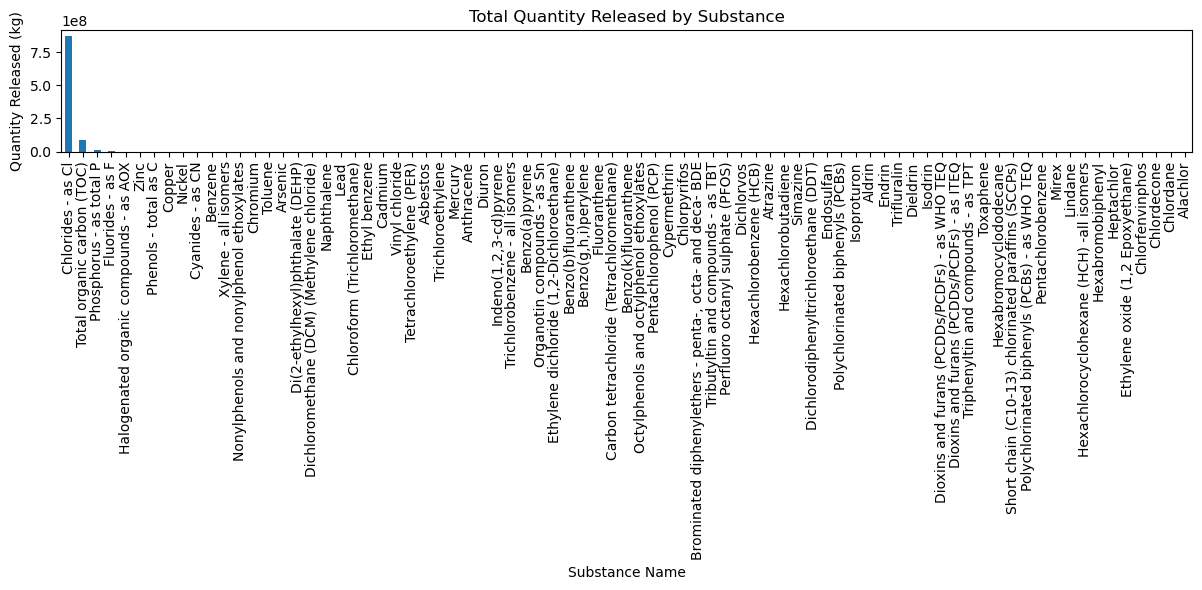

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and convert quantity column
df["QUANTITY RELEASED (kg)"] = pd.to_numeric(df["QUANTITY RELEASED (kg)"], errors="coerce").fillna(0)

# Group by substance and sum quantities
substance_totals = df.groupby("SUBSTANCE NAME")["QUANTITY RELEASED (kg)"].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
substance_totals.plot(kind='bar')

plt.title("Total Quantity Released by Substance")
plt.xlabel("Substance Name")
plt.ylabel("Quantity Released (kg)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [48]:
len(df16_no_gas)

13415

In [49]:
# Ensure quantity column is cleaned
df20_no_gas["QUANTITY RELEASED (kg)"] = pd.to_numeric(
    df20_no_gas["QUANTITY RELEASED (kg)"], errors="coerce"
).fillna(0)

df21["SUBSTANCE NAME"] = df21["SUBSTANCE NAME"].astype(str)

# Filter for copper and sum the quantity
copper_total = df21[df21["SUBSTANCE NAME"].str.lower() == "Copper"]["QUANTITY RELEASED (kg)"].sum()

print(f"Total copper released in df21: {copper_total:,.2f} kg")

# Ensure quantity column is cleaned
df20_no_gas["QUANTITY RELEASED (kg)"] = pd.to_numeric(
    df20_no_gas["QUANTITY RELEASED (kg)"], errors="coerce"
).fillna(0)

# Filter for copper and sum the quantity
copper_total = df21[df21["SUBSTANCE NAME"].str.lower() == "chlorides - as cl"]["QUANTITY RELEASED (kg)"].sum()

print(f"Total chlorides - as cl released in df21: {copper_total:,.2f} kg")

unique_routes = df21_no_gas["ROUTE NAME"].unique()
print(unique_routes)

# Normalize ROUTE NAME in case of case/whitespace issues
df["ROUTE NAME"] = df["ROUTE NAME"].str.strip().str.lower()

# Filter for route = 'land'
land_df = df[df["ROUTE NAME"] == "land"]

# Convert quantity to numeric and clean it
land_df["QUANTITY RELEASED (kg)"] = pd.to_numeric(
    land_df["QUANTITY RELEASED (kg)"], errors="coerce"
).fillna(0)

# View all values
print(land_df[["SUBSTANCE NAME", "QUANTITY RELEASED (kg)"]])


Total copper released in df21: 0.00 kg


TypeError: can only concatenate str (not "int") to str

In [ ]:
# Step 1: Filter each DataFrame to only include rows where SUBSTANCE NAME is 'copper'
for name, df in df_dict.items():
    df = df[df["SUBSTANCE NAME"] == "Copper"]
    
    # Step 3: Update the dictionary with the transformed DataFrame
    df_dict[name] = df

df_no_gas = df_dict["df_no_gas"]
df22_no_gas = df_dict["df22_no_gas"]
df21_no_gas = df_dict["df21_no_gas"]
df20_no_gas = df_dict["df20_no_gas"]
df19_no_gas = df_dict["df19_no_gas"]
df18_no_gas = df_dict["df18_no_gas"]
df17_no_gas = df_dict["df17_no_gas"]
df16_no_gas = df_dict["df16_no_gas"]


In [ ]:
df21_no_gas.head()

In [ ]:
#show what each label represents
for col in categorical_columns:
    unique_values = {value: idx for idx, value in enumerate(sorted(df_no_gas_cleaned[col].unique()))}
    print(f"\nLabel mappings for {col}:")
    for value, label in unique_values.items():
        print(f"{label}: {value}")

In [ ]:
#convert Easting/Northing to Latitude/Longitude
in_proj = Proj(init='epsg:27700')  #British National Grid
out_proj = Proj(init='epsg:4326')  #WGS84 (Latitude/Longitude)

#CONVERSION
def convert_coordinates(row):
    lon, lat = transform(in_proj, out_proj, row['EASTING'], row['NORTHING'])
    return pd.Series([lat, lon])

#df_no_gas_cleaned[['Latitude', 'Longitude']] = df_no_gas_cleaned.apply(convert_coordinates, axis=1)

In [ ]:
df_no_gas[['Latitude', 'Longitude']] = df_no_gas.apply(convert_coordinates, axis=1)


In [ ]:
df22_no_gas[['Latitude', 'Longitude']] = df22_no_gas.apply(convert_coordinates, axis=1)
df21_no_gas[['Latitude', 'Longitude']] = df21_no_gas.apply(convert_coordinates, axis=1)
df20_no_gas[['Latitude', 'Longitude']] = df20_no_gas.apply(convert_coordinates, axis=1)
df19_no_gas[['Latitude', 'Longitude']] = df19_no_gas.apply(convert_coordinates, axis=1)
df18_no_gas[['Latitude', 'Longitude']] = df18_no_gas.apply(convert_coordinates, axis=1)
df17_no_gas[['Latitude', 'Longitude']] = df17_no_gas.apply(convert_coordinates, axis=1)
df16_no_gas[['Latitude', 'Longitude']] = df16_no_gas.apply(convert_coordinates, axis=1)


In [ ]:
df_no_gas.head()


In [ ]:
df18_no_gas.shape[0]


In [ ]:
import json
from shapely.geometry import shape, Point
import geopandas as gpd

# Your existing dataframe
# Make sure it has columns: LATITUDE and LONGITUDE
# Example: df_no_gas_cleaned = pd.read_csv("your_data.csv")

# Load the GeoJSON manually (replace with your actual path)
with open("Regions_December_2024_Boundaries_EN_BFC_1195854647342073399 (1).geojson") as f:
    regions_geojson = json.load(f)

# Extract region polygons and names
region_shapes = []
for feature in regions_geojson["features"]:
    region_name = feature["properties"]["RGN24NM"]  # Adjust this to match your GeoJSON field
    polygon = shape(feature["geometry"])
    region_shapes.append((region_name, polygon))

# Function to find which region a point belongs to
def get_region_for_point(lat, lon):
    point = Point(lon, lat)
    for name, polygon in region_shapes:
        if polygon.contains(point):
            return name
    return None  # If it doesn't fall into any known region

# Apply function to your dataframe
#df_no_gas_cleaned["REGION"] = df_no_gas_cleaned.apply(
 #   lambda row: get_region_for_point(row["Latitude"], row["Longitude"]),
  #  axis=1
#)

# Apply function to your dataframe
df_no_gas["REGION"] = df_no_gas.apply(
    lambda row: get_region_for_point(row["Latitude"], row["Longitude"]),
    axis=1
)
# Check result
#print(df_no_gas_cleaned[["Latitude", "Longitude", "REGION"]].head())
print(df_no_gas[["Latitude", "Longitude", "REGION"]].head())

In [ ]:
df22_no_gas["REGION"] = df22_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)
df21_no_gas["REGION"] = df21_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)
df20_no_gas["REGION"] = df20_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)
df19_no_gas["REGION"] = df19_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)
df18_no_gas["REGION"] = df18_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)
df17_no_gas["REGION"] = df17_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)
df16_no_gas["REGION"] = df16_no_gas.apply(lambda row: get_region_for_point(row["Latitude"], row["Longitude"]), axis=1)


In [ ]:
# Inspect one feature to see available keys
print(regions_geojson["features"][0]["properties"])


In [ ]:
#df_no_gas_cleaned['REGION']

In [ ]:
#df_no_gas_cleaned.reset_index(drop=True, inplace=True)

#df_no_gas_cleaned
df21_no_gas

In [ ]:
#create new excel files
#df_no_gas.to_excel("pollution_no_gas.xlsx",index=False)
#df_no_gas_cleaned.to_excel("pollution_no_gas_cleaned.xlsx",index=False)

df_no_gas.to_excel("pollution23_copper.xlsx", index=False)
df22_no_gas.to_excel("pollution22_copper.xlsx", index=False)
df21_no_gas.to_excel("pollution21_copper.xlsx", index=False)
df20_no_gas.to_excel("pollution20_copper.xlsx", index=False)
df19_no_gas.to_excel("pollution19_copper.xlsx", index=False)
df18_no_gas.to_excel("pollution18_copper.xlsx", index=False)
df17_no_gas.to_excel("pollution17_copper.xlsx", index=False)
df16_no_gas.to_excel("pollution16_copper.xlsx", index=False)


In [ ]:
# Filter rows with missing REGION
missing_regions = df21_no_gas[df21_no_gas["REGION"].isna()]
print(missing_regions)

# Print index (row number) and SITE POSTCODE
#for index, row in missing_regions.iterrows():
 #   print(f"Row {index}: Longitude = {row['Longitude']},Latitude = {row['Latitude']}")



In [ ]:
#def assign_region(lat, lon):
 #   point = Point(lon, lat)
  #  for region_name, polygon in region_shapes:
   #     if polygon.contains(point) or polygon.touches(point):
    #        return region_name
     #   if polygon.buffer(0.0001).contains(point):  # Handle edge cases
      #      return region_name
    #return None

# First get just the unmatched points
#missing_mask = df_no_gas_cleaned["REGION"].isna()

# Reassign REGION using the new robust method
#df_no_gas_cleaned.loc[missing_mask, "REGION"] = df_no_gas_cleaned[missing_mask].apply(
 #   lambda row: assign_region(row["Latitude"], row["Longitude"]), axis=1
#)

# Check if any are still unmatched
#still_missing = df_no_gas_cleaned[df_no_gas_cleaned["REGION"].isna()]
#print(f"Still missing after retry: {len(still_missing)}")


In [52]:
print(df22)

      AUTHORISATION ID / PERMIT ID  \
0                         MP3832FY   
1                         MP3832FY   
2                         MP3832FY   
3                         MP3832FY   
4                         MP3832FY   
...                            ...   
31484                     XP3503PF   
31485                     JP3707SC   
31486                     BT7086IJ   
31487                     BT7086IJ   
31488                     BT7086IJ   

                                    ACTIVITY DESCRIPTION  \
0      PHARMACEUTICALS; PRODUCING PHARMACEUTICALS USI...   
1      PHARMACEUTICALS; PRODUCING PHARMACEUTICALS USI...   
2      PHARMACEUTICALS; PRODUCING PHARMACEUTICALS USI...   
3      PHARMACEUTICALS; PRODUCING PHARMACEUTICALS USI...   
4      PHARMACEUTICALS; PRODUCING PHARMACEUTICALS USI...   
...                                                  ...   
31484  RECOVERY OR A MIX OF RECOVERY AND DISPOSAL OF ...   
31485  ORGANIC CHEMICALS; OXYGEN CONTAINING COMPOUNDS...   
314

In [ ]:
# List of original datasets

# Clean and find top 5 substances
for name, data in df_dict.items():
    # Convert to numeric and set invalid (non-numeric) entries to 0
    data["QUANTITY RELEASED (kg)"] = pd.to_numeric(
        data["QUANTITY RELEASED (kg)"], errors="coerce"
    ).fillna(0)

    # Now get top 5 polluting chemicals
    top5 = data.groupby("SUBSTANCE NAME")["QUANTITY RELEASED (kg)"].sum().nlargest(5)
    
    print(f"\nTop 5 polluting chemicals in {name}:")
    print(top5)
